In [1]:
# - Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Utils
import numpy as np
from tqdm import tqdm

# Torch Imports
import torch
from torch.nn import MSELoss
from torch.optim import Adam

# Rockpool Imports
from rockpool.nn.modules import LIFTorch, LinearTorch
from rockpool.nn.modules.torch.lif_torch import StepPWL
from rockpool.nn.combinators import Sequential
from rockpool.parameters import Constant
from rockpool.timeseries import TSContinuous, TSEvent

# - Plotting and config
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['figure.dpi'] = 300

Could not import package: 'Brian2'backend not found. Modules that rely on Brian will not be available.
Could not import package: No module named 'iaf_nest'


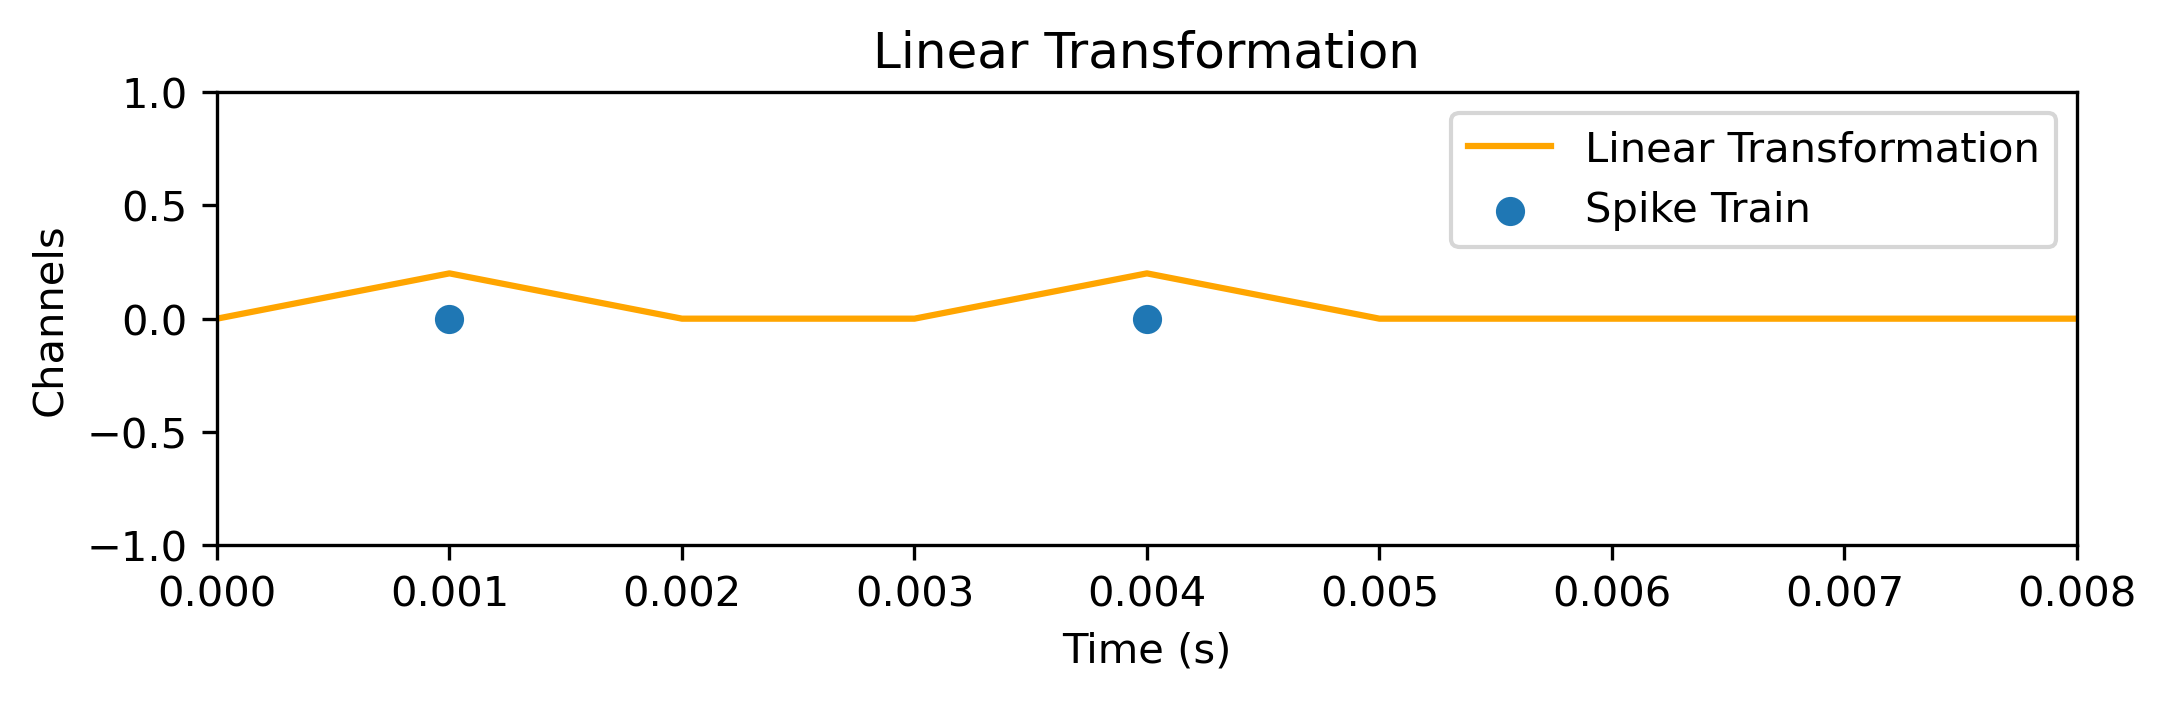

In [2]:
plt.rcParams['figure.figsize'] = [8, 2]
plt.rcParams['figure.dpi'] = 300

dt= 1e-3

lin = LinearTorch(shape=(1,1), weight=torch.tensor([[.2]]), has_bias=False)
spike_train = torch.tensor([[[0, 1, 0, 0, 1, 0, 0, 0, 0 ]]], dtype=torch.float).transpose(1,2)
out, _, _ = lin(spike_train)

linear_trans = TSContinuous.from_clocked(out.detach().numpy().flatten(), dt=dt, name="Linear Transformation")
spikes_ts = TSEvent.from_raster(spike_train.detach().numpy().flatten(), dt=dt, name="Spike Train", spikes_at_bin_start=True, t_stop=0.008)
linear_trans.plot(color="orange")
spikes_ts.plot()
plt.legend();

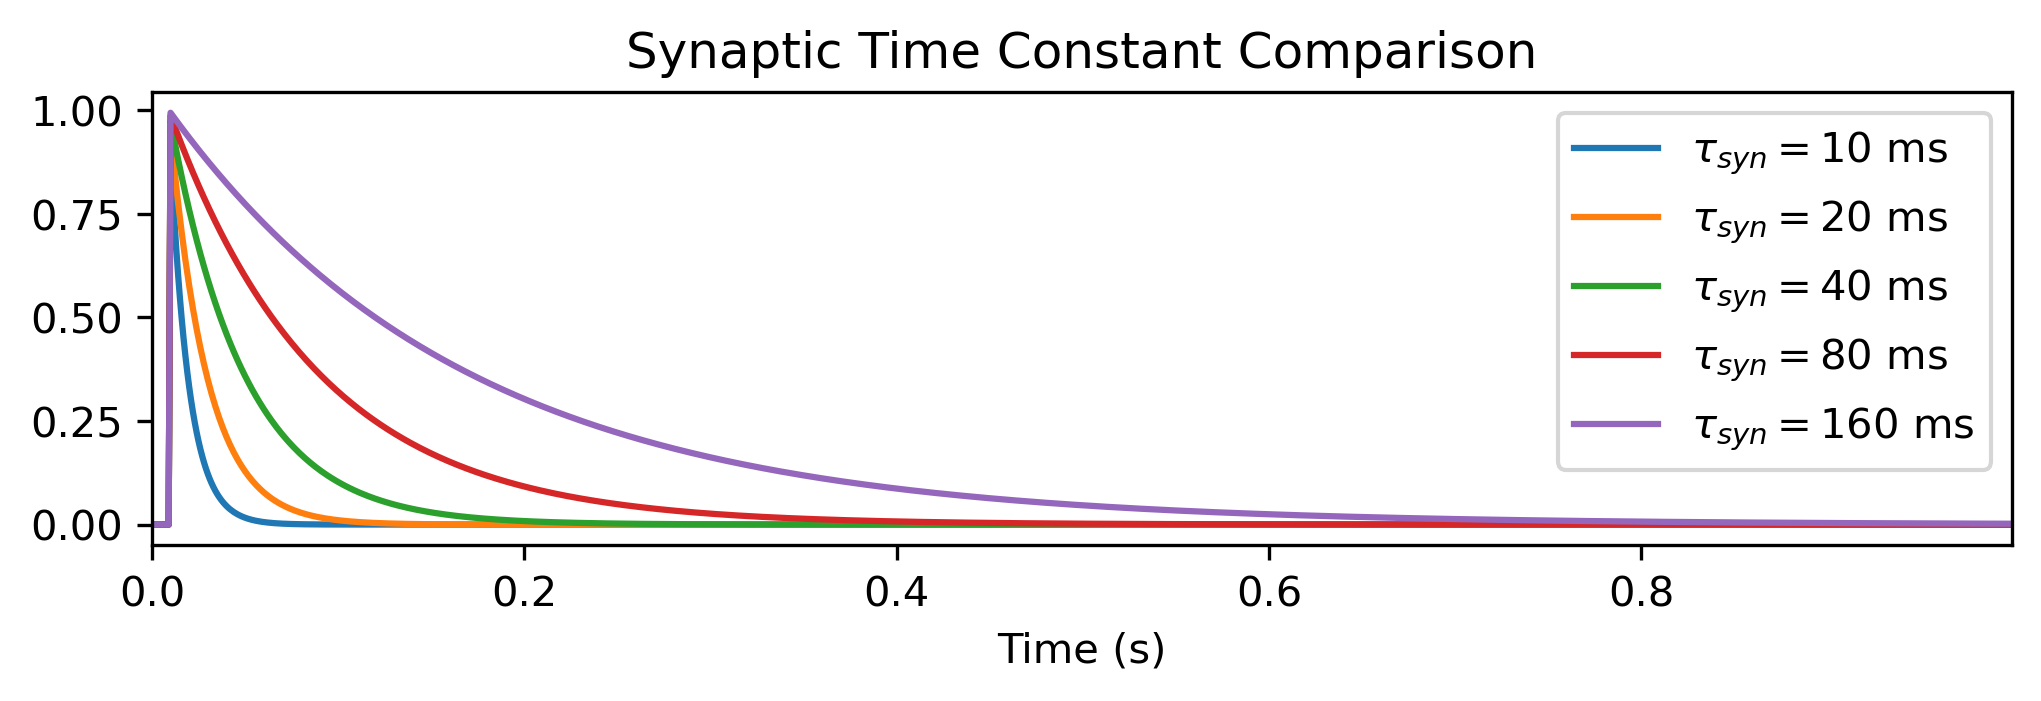

In [17]:
# plt.rcParams['figure.figsize'] = [8, 2]
# plt.rcParams['figure.dpi'] = 300

# dt= 1e-3

lif_10 = LIFTorch(
    shape=(1, 1),
    tau_mem=Constant(0.03),
    tau_syn=Constant(0.01),
    bias=Constant(0.0),
    threshold=Constant(1.0),
    spike_generation_fn=StepPWL,
    dt=dt,
)

lif_20 = LIFTorch(
    shape=(1, 1),
    tau_mem=Constant(0.03),
    tau_syn=Constant(0.02),
    bias=Constant(0.0),
    threshold=Constant(1.0),
    spike_generation_fn=StepPWL,
    dt=dt,
)

lif_40 = LIFTorch(
    shape=(1, 1),
    tau_mem=Constant(0.03),
    tau_syn=Constant(0.04),
    bias=Constant(0.0),
    threshold=Constant(1.0),
    spike_generation_fn=StepPWL,
    dt=dt,
)

lif_80 = LIFTorch(
    shape=(1, 1),
    tau_mem=Constant(0.03),
    tau_syn=Constant(0.08),
    bias=Constant(0.0),
    threshold=Constant(1.0),
    spike_generation_fn=StepPWL,
    dt=dt,
)

lif_160 = LIFTorch(
    shape=(1, 1),
    tau_mem=Constant(0.03),
    tau_syn=Constant(0.16),
    bias=Constant(0.0),
    threshold=Constant(1.0),
    spike_generation_fn=StepPWL,
    dt=dt,
)

one_spike_train = torch.zeros((1, 1000, 1))
one_spike_train[0, 10, 0] = 1

_, _, rec_10 = lif_10(one_spike_train, record=True)
_, _, rec_20 = lif_20(one_spike_train, record=True)
_, _, rec_40 = lif_40(one_spike_train, record=True)
_, _, rec_80 = lif_80(one_spike_train, record=True)
_, _, rec_160 = lif_160(one_spike_train, record=True)

plt.figure()
isyn_10 = TSContinuous.from_clocked(rec_10["isyn"].detach().numpy().flatten(), dt=dt, name=r"$\tau_{syn} = 10$ ms")
isyn_20 = TSContinuous.from_clocked(rec_20["isyn"].detach().numpy().flatten(), dt=dt, name=r"$\tau_{syn} = 20$ ms")
isyn_40 = TSContinuous.from_clocked(rec_40["isyn"].detach().numpy().flatten(), dt=dt, name=r"$\tau_{syn} = 40$ ms")
isyn_80 = TSContinuous.from_clocked(rec_80["isyn"].detach().numpy().flatten(), dt=dt, name=r"$\tau_{syn} = 80$ ms")
isyn_160 = TSContinuous.from_clocked(rec_160["isyn"].detach().numpy().flatten(), dt=dt, name=r"$\tau_{syn} = 160$ ms")
isyn_10.plot()
isyn_20.plot()
isyn_40.plot()
isyn_80.plot()
isyn_160.plot()
plt.title("Synaptic Time Constant Comparison")
plt.legend();

